## POLLUTION SIMULATION

- Background Polution (BP) is chosen randomly from -10 to 10 for all nodes<br>
- At t=0
    - PM2.5 concentration is chosen randomly from 20 to 35 for all nodes
    - Convective transfers (both Pij and Pji) are assumed to be 0

In [258]:
import pandas as pd
import numpy as np
import math
import random

    
random.seed(3)

# transforming info from geographic data to list of adjacents
# adjacents - transforming info from geographic data to list of adjacents
ad=[None]*22
ad[0]=[2,22]
ad[1]=[1,3]
ad[2]=[2,4,8]
ad[3]=[3,5]
ad[4]=[4,6]
ad[5]=[5,7,9]
ad[6]=[6,8]
ad[7]=[3,7,12,21]
ad[8]=[6,10,11]
ad[9]=[9,13]
ad[10]=[9,12]
ad[11]=[8,11,13]
ad[12]=[10,12,14,18]
ad[13]=[13,15]
ad[14]=[14,16]
ad[15]=[15,17]
ad[16]=[16,19]
ad[17]=[13,19]
ad[18]=[17,18,20]
ad[19]=[19,22]
ad[20]=[8,22]
ad[21]=[1,20,21]

# Distance matrix
dis=[None]*22
dis[0]=[2,3]
dis[1]=[2,4]
dis[2]=[4,3,4]
dis[3]=[3,2]
dis[4]=[2,3]
dis[5]=[3,2,5]
dis[6]=[2,2]
dis[7]=[4,2,4,3]
dis[8]=[5,3,3]
dis[9]=[3,3]
dis[10]=[3,3]
dis[11]=[4,3,7]
dis[12]=[3,7,5,4]
dis[13]=[5,2]
dis[14]=[2,3]
dis[15]=[3,3]
dis[16]=[3,6]
dis[17]=[4,5]
dis[18]=[6,5,8]
dis[19]=[8,7]
dis[20]=[3,3]
dis[21]=[3,7,3]

dis=[[250*j for j in dis[i]] for i in range(22)]

# BP of each node
    # for now choosing randomly, later on BP is determined by several other factors
    # BP is list of list which contains Background polution data of all 22 nodes for all 24 hours

BP = [[round(random.uniform(-10,10),3) for j in range(22)] for i in range(24)]

# Convective transfer
    # convective tansfer coefficient (K)
    # for now choosing K to be a constant, later on it might be varying for different nodal interactions
K=0.5

# pollution data for each node
pol=[[0 for i in range(22)] for j in range(24)]
pol_i_to_j=[[[0 for i in range(22)] for j in range(22)] for k in range(24)]
pol_j_to_i=[[[0 for i in range(22)] for j in range(22)] for k in range(24)]

# starting case at t=0
pol[0]=[random.uniform(20,35) for i in range(22)]
pol_i_to_j[0]=[[0]*22]*22
pol_j_to_i[0]=[[0]*22]*22

# convective transfer
dis_inv=[[1/i for i in dis[j]] for j in range(22)]


# at any time t
for t in range(1,24):
    
    # convective transfer
    # i to j
    for i in range(22):
        for j in ad[i]:
            pol_i_to_j[t][i][j-1]=K*pol[t-1][i]*dis_inv[i][ad[i].index(j)]/sum(dis_inv[i])
    
    # j to i
    for i in range(22):
        for j in ad[i]:
            pol_j_to_i[t][i][j-1]=K*pol[t-1][j-1]*dis_inv[i][ad[i].index(j)]/sum(dis_inv[j-1])
            
    # pollution concentration
    pol[t]=[(pol[t-1][i]+BP[t][i]-sum(pol_i_to_j[t][i])+sum(pol_j_to_i[t][i])) for i in range(22)]
    
pol_node=list(zip(*pol))
net_Pij=list(zip(*[[sum(pol_i_to_j[t][i]) for i in range(22)] for t in range(24)]))
net_Pji=list(zip(*[[sum(pol_j_to_i[t][i]) for i in range(22)] for t in range(24)]))
BP_node=list(zip(*BP))

In [259]:
# data frame
import pandas as pd
dict_pol=[None]*22
for i in range(22):
    dict_pol[i]={'PM2.5':pol_node[i],'BP':BP_node[i],'$P_ i->j$':net_Pij[i],'$P_ j->i$':net_Pji[i]}
    df=pd.DataFrame(dict_pol[0])
    df.to_csv(f'')


,PM2.5,BP,$P_ i->j$,$P_ j->i$
0,29.020460,-5.241,0.000000,0.000000
1,35.205174,5.165,14.510230,15.529945
2,33.079283,0.145,17.602587,15.331696
3,36.885440,7.079,16.539641,13.266798
4,27.947708,-6.052,18.442720,15.556988
5,37.431552,9.556,13.973854,13.901698
6,34.328425,1.853,18.715776,13.759649
7,37.394370,6.671,17.164212,13.559158
8,37.266258,5.877,18.697185,12.692072
9,25.003804,-5.451,18.633129,11.821675


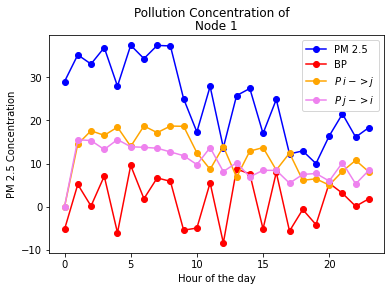

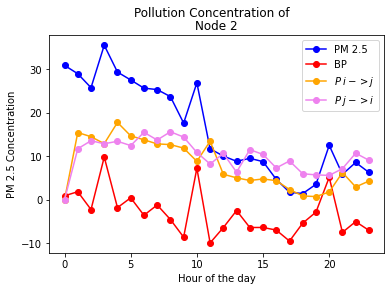

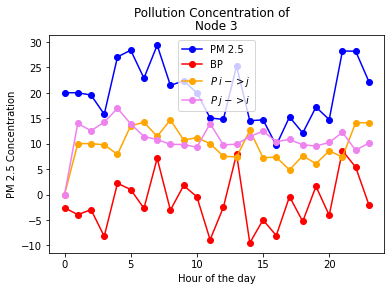

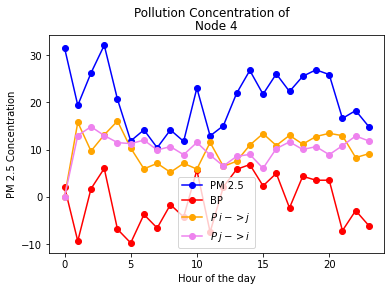

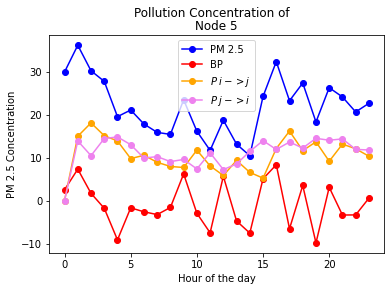

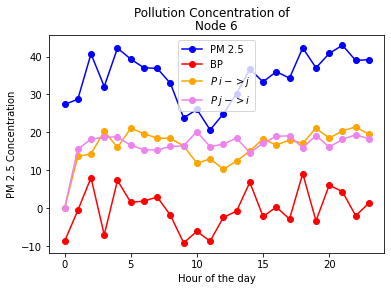

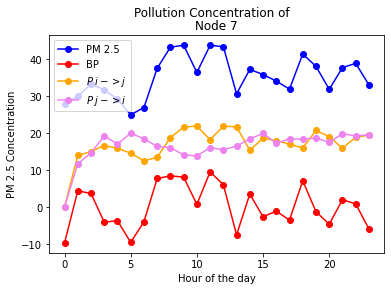

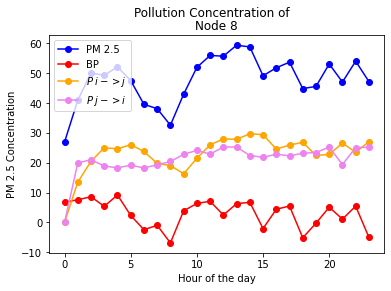

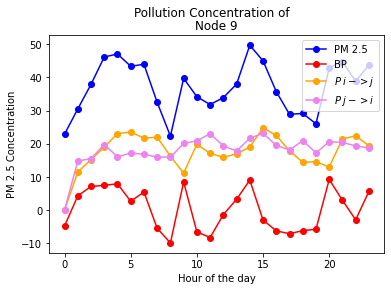

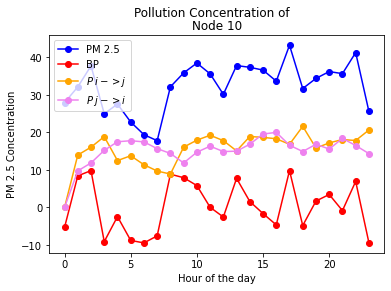

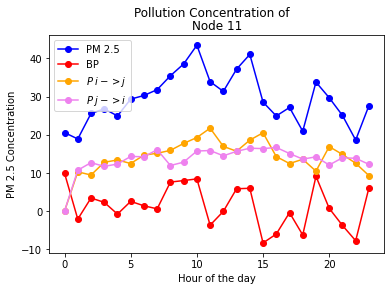

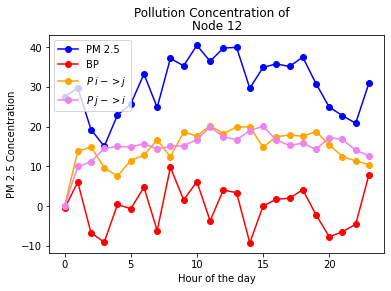

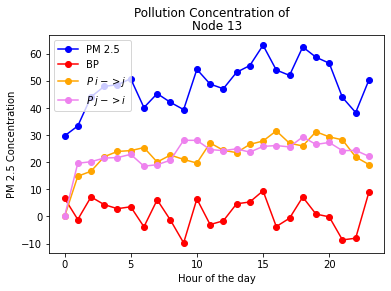

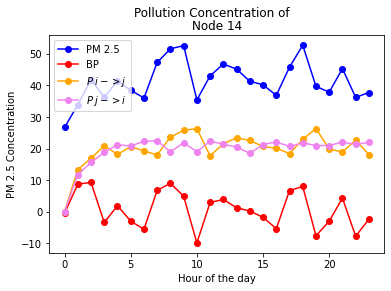

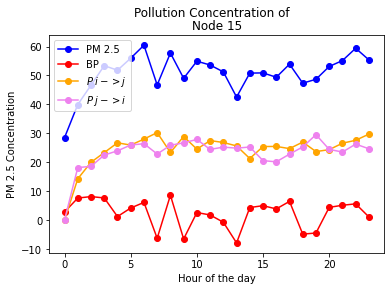

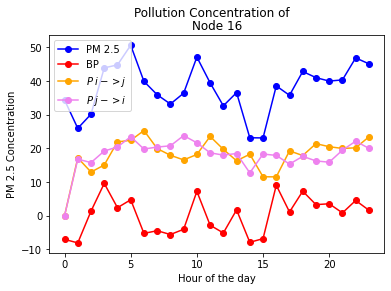

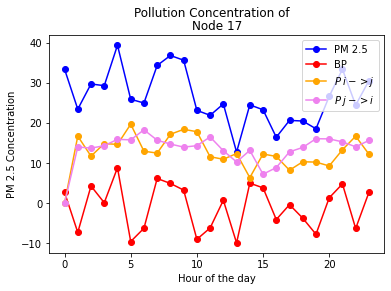

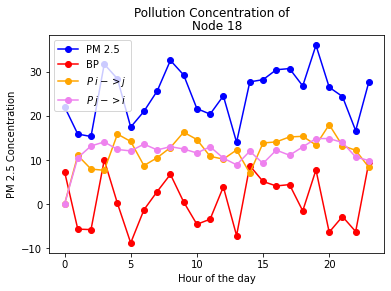

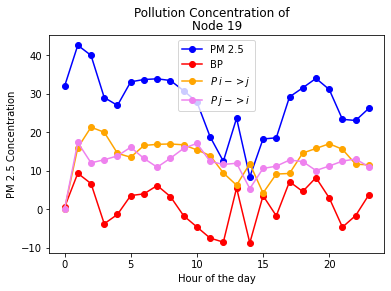

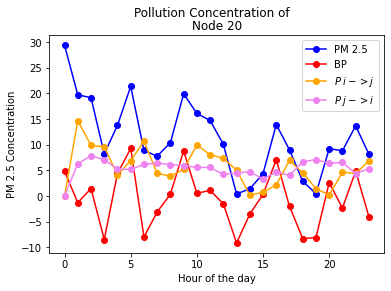

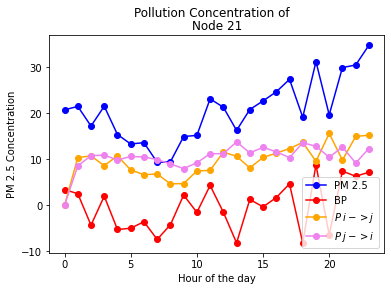

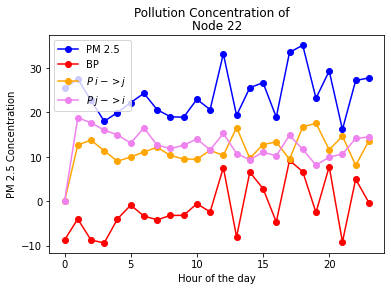

In [260]:
import matplotlib.pyplot as plt
for i in range(22):
    x=np.arange(0,24,1)
    fig,ax = plt.subplots()
    fig.suptitle('Pollution Concentration of')
    ax_1=ax
    ax_1.plot(x,np.array(pol_node[i]),'o-',color='blue',label='PM 2.5')
    ax_1.plot(x,list(zip(*BP))[i],'o-',color='red',label='BP')
    ax_1.plot(x,net_Pij[i],'o-',color='orange',label='$P_ i->j$')
    ax_1.plot(x,net_Pji[i],'o-',color='violet',label='$P_ j->i$')
    ax_1.legend()
    ax_1.set_title(f'Node {i+1}')
    ax_1.set_xlabel('Hour of the day')
    ax_1.set_ylabel('PM 2.5 Concentration')
    plt.show()